
## Course 4: Feature Selection & Dimensionality Reduction

### Problem Statement
#### Understanding the Customer purchase behaviour against various products of different categories.



### About the dataset
#### The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.


### Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing dataset


In [2]:
train = pd.read_csv('Project.csv')

### Descriptive Statistics

### Preview training dataset


In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Training dataset dimensions - (rows, columns)


In [4]:
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Training data: 
Rows: 550068 Columns: 12


### Features data-type


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Statistical summary


In [6]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Checking for Null values


In [7]:
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

### Checking the counts of unique values


In [8]:
round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: Age, dtype: object

### Checking the counts of unique values


In [9]:
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

### Observations:
1. The feature 'Product_Category_2' contains 31.57% null values which can be imputed whereas 'Product_Category_3' contains 69.67% null values so we can drop this feature.

2. The features 'Age' and 'Stay_In_Current_City_Years' contain some values which have '+' in them which need to be replaced.



### Exploratory Data Analysis

### Univariate Analysis

### Creating a distplot for dependent feature 'Purchase'


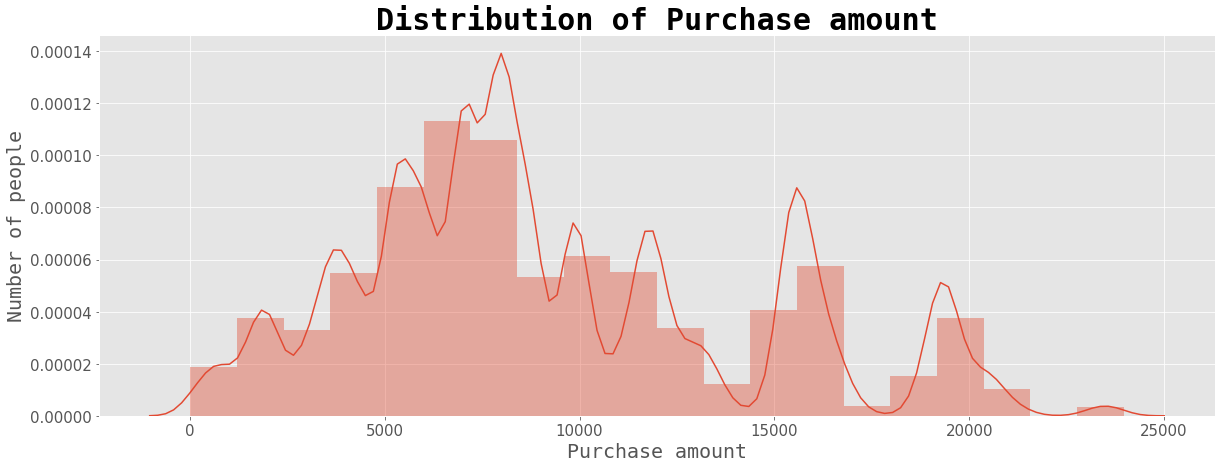

In [10]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

### Creating a barplot for 'Gender'


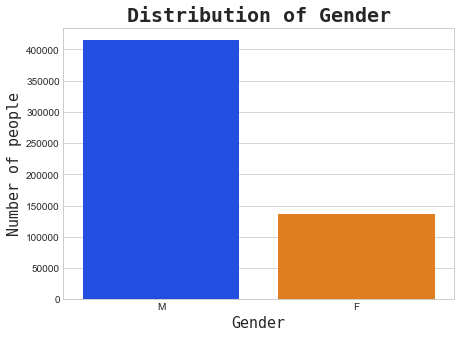

In [11]:
gen = train['Gender'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

### Creating a pie chart for 'City Category'


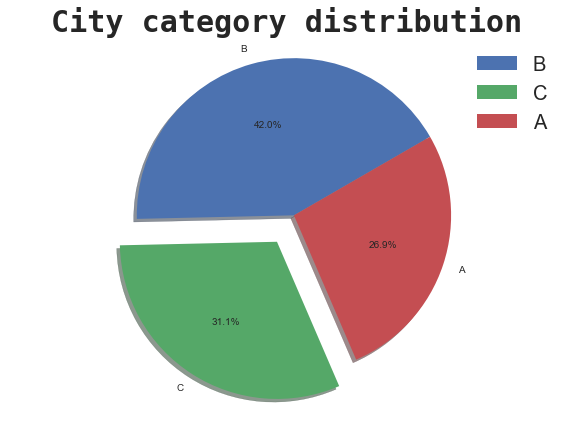

In [12]:
city = train['City_Category'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (10, 7))
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.20, 0), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

### Creating a donut chart for 'Age'


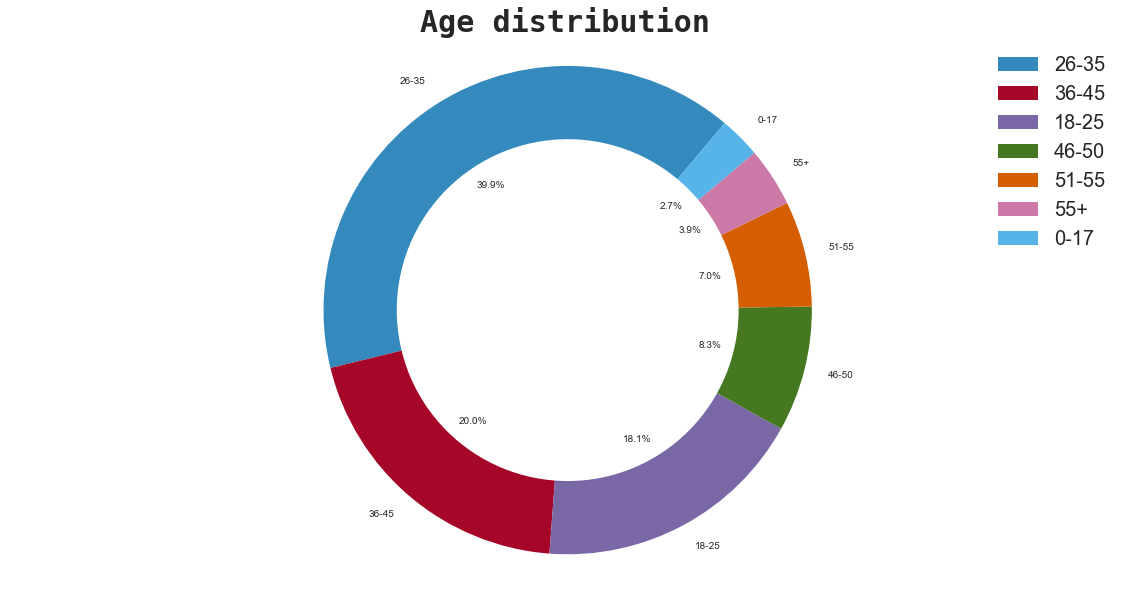

In [13]:
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

### Creating a barplot for 'Occupation'


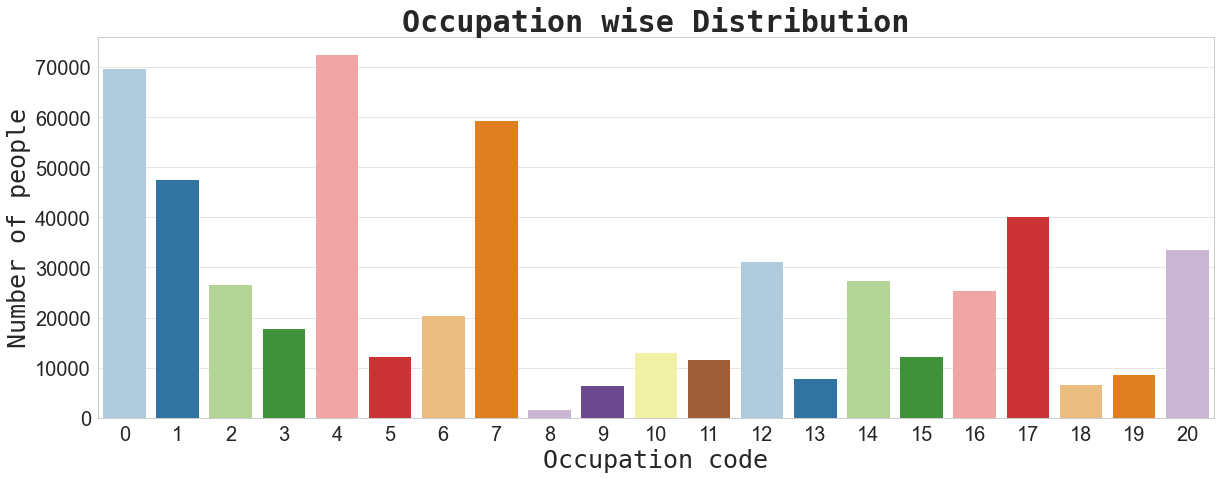

In [14]:
occupation = train['Occupation'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
sns.barplot(occupation.index, occupation.values, palette = 'Paired')
plt.title('Occupation wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.tick_params(labelsize = 20)
plt.show()

### Creating a countplot for 'Marital Status'


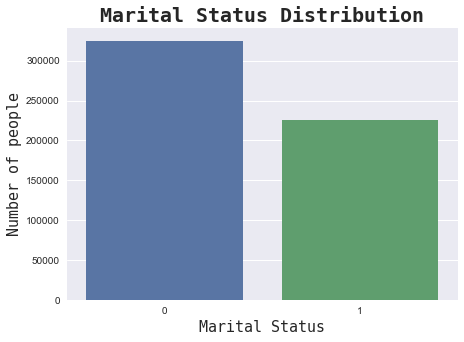

In [15]:
plt.style.use('seaborn')
plt.figure(figsize = (7, 5))
sns.countplot(train['Marital_Status'])
plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

### Creating a Treemap for 'Stay_In_Current_City_Years'


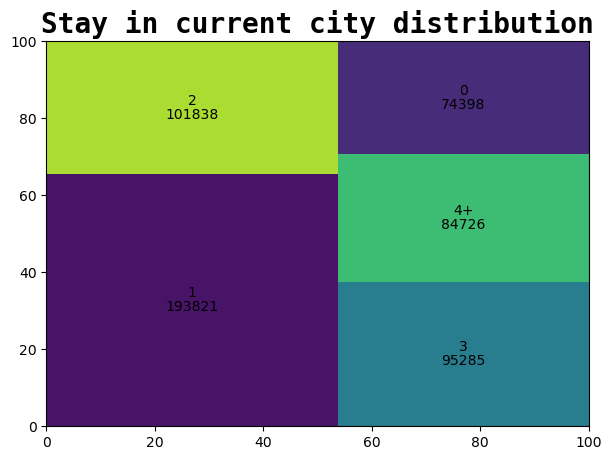

In [16]:
stay = train['Stay_In_Current_City_Years'].value_counts()

import squarify
plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = stay.values, label = stay.index, value = stay.values)
plt.title('Stay in current city distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()


### Bivariate Analysis

### Creating a barplot of 'Occupation vs Purchase'


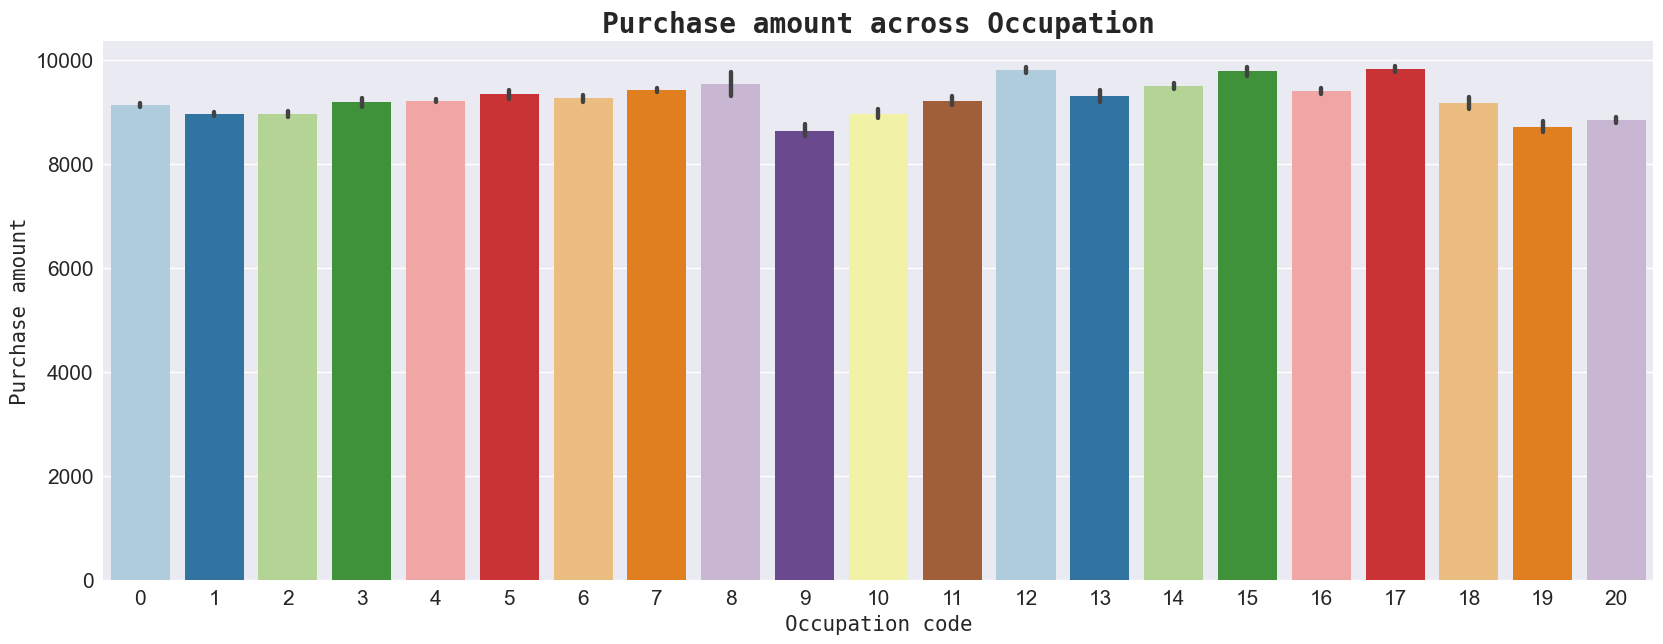

In [17]:
plt.figure(figsize = (20, 7))
plt.style.use('seaborn')
sns.barplot(train['Occupation'], train['Purchase'], palette = 'Paired')
plt.title('Purchase amount across Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()


### Creating a boxplot of 'Age vs Purchase'


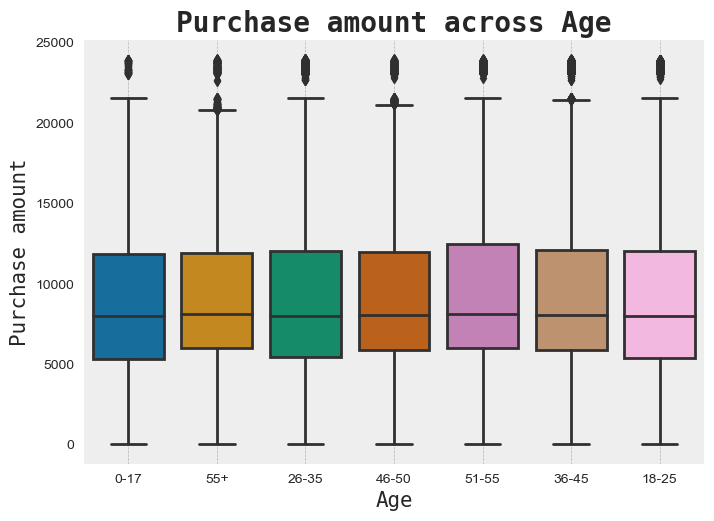

In [18]:


plt.style.use('bmh')
sns.boxplot(train['Age'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.grid()
plt.show()


### Creating a barplot of 'Gender vs Purchase'


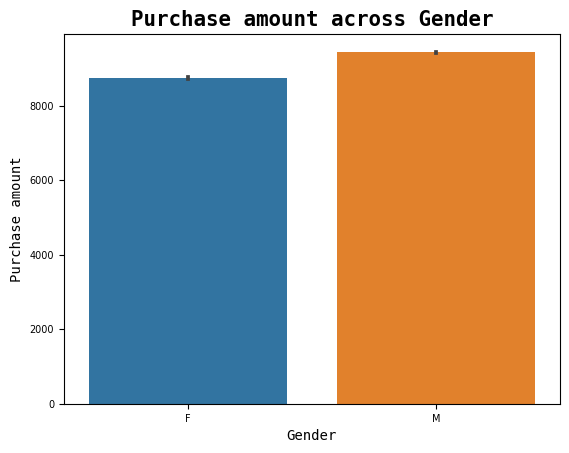

In [19]:
plt.style.use('default')
sns.barplot(train['Gender'], train['Purchase'])
plt.title('Purchase amount across Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)

plt.show()

### Creating a barplot of 'City_Category vs Purchase'


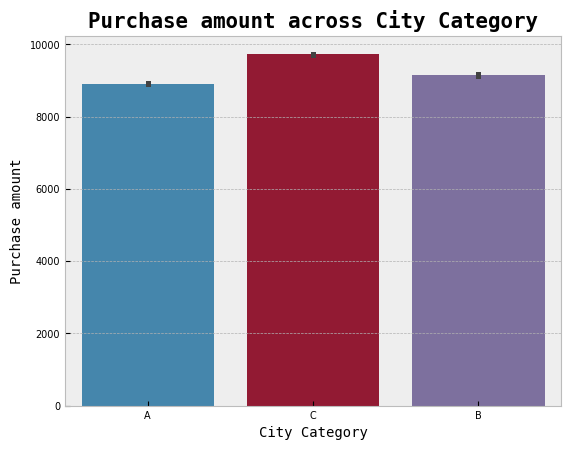

In [20]:
plt.style.use('bmh')
sns.barplot(train['City_Category'], train['Purchase'])
plt.title('Purchase amount across City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

### Creating a barplot of 'Product_Category_1 vs Purchase'


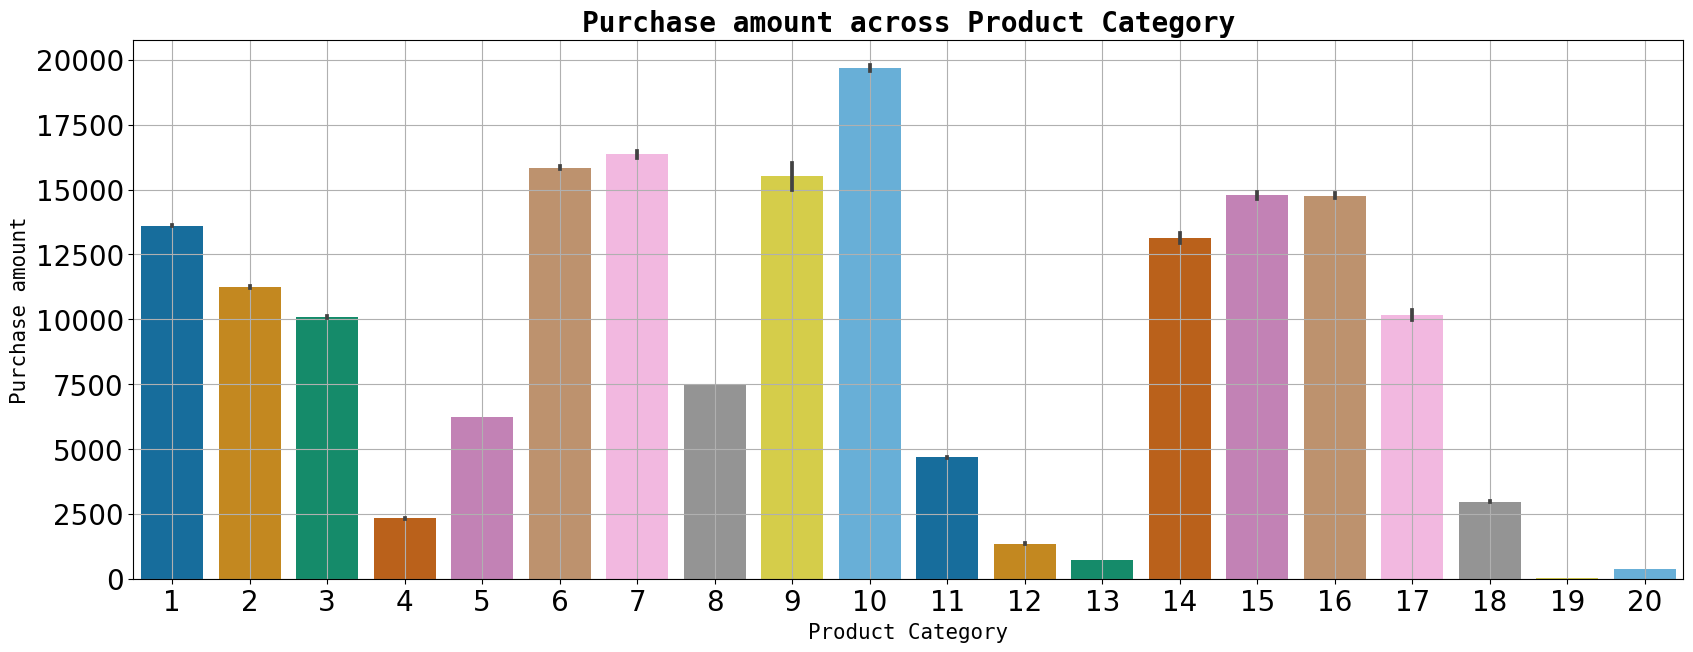

In [21]:
plt.style.use('default')
plt.figure(figsize = (20, 7))
sns.barplot(train['Product_Category_1'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

### Creating a barplot of 'Marital Status vs Purchase'


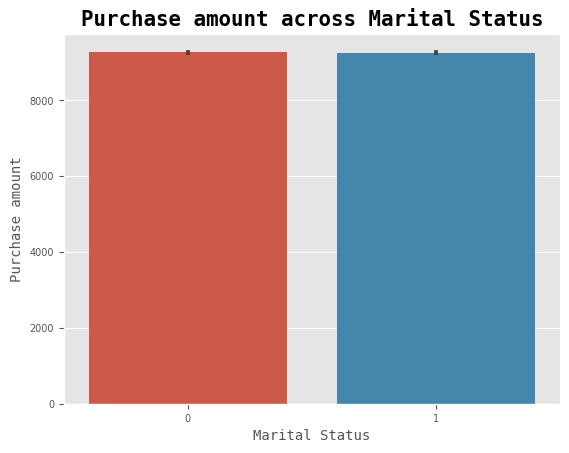

In [22]:
plt.style.use('ggplot')
sns.barplot(train['Marital_Status'], train['Purchase'])
plt.title('Purchase amount across Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

### Multivariate Analysis

### Creating a Pairplot for all features


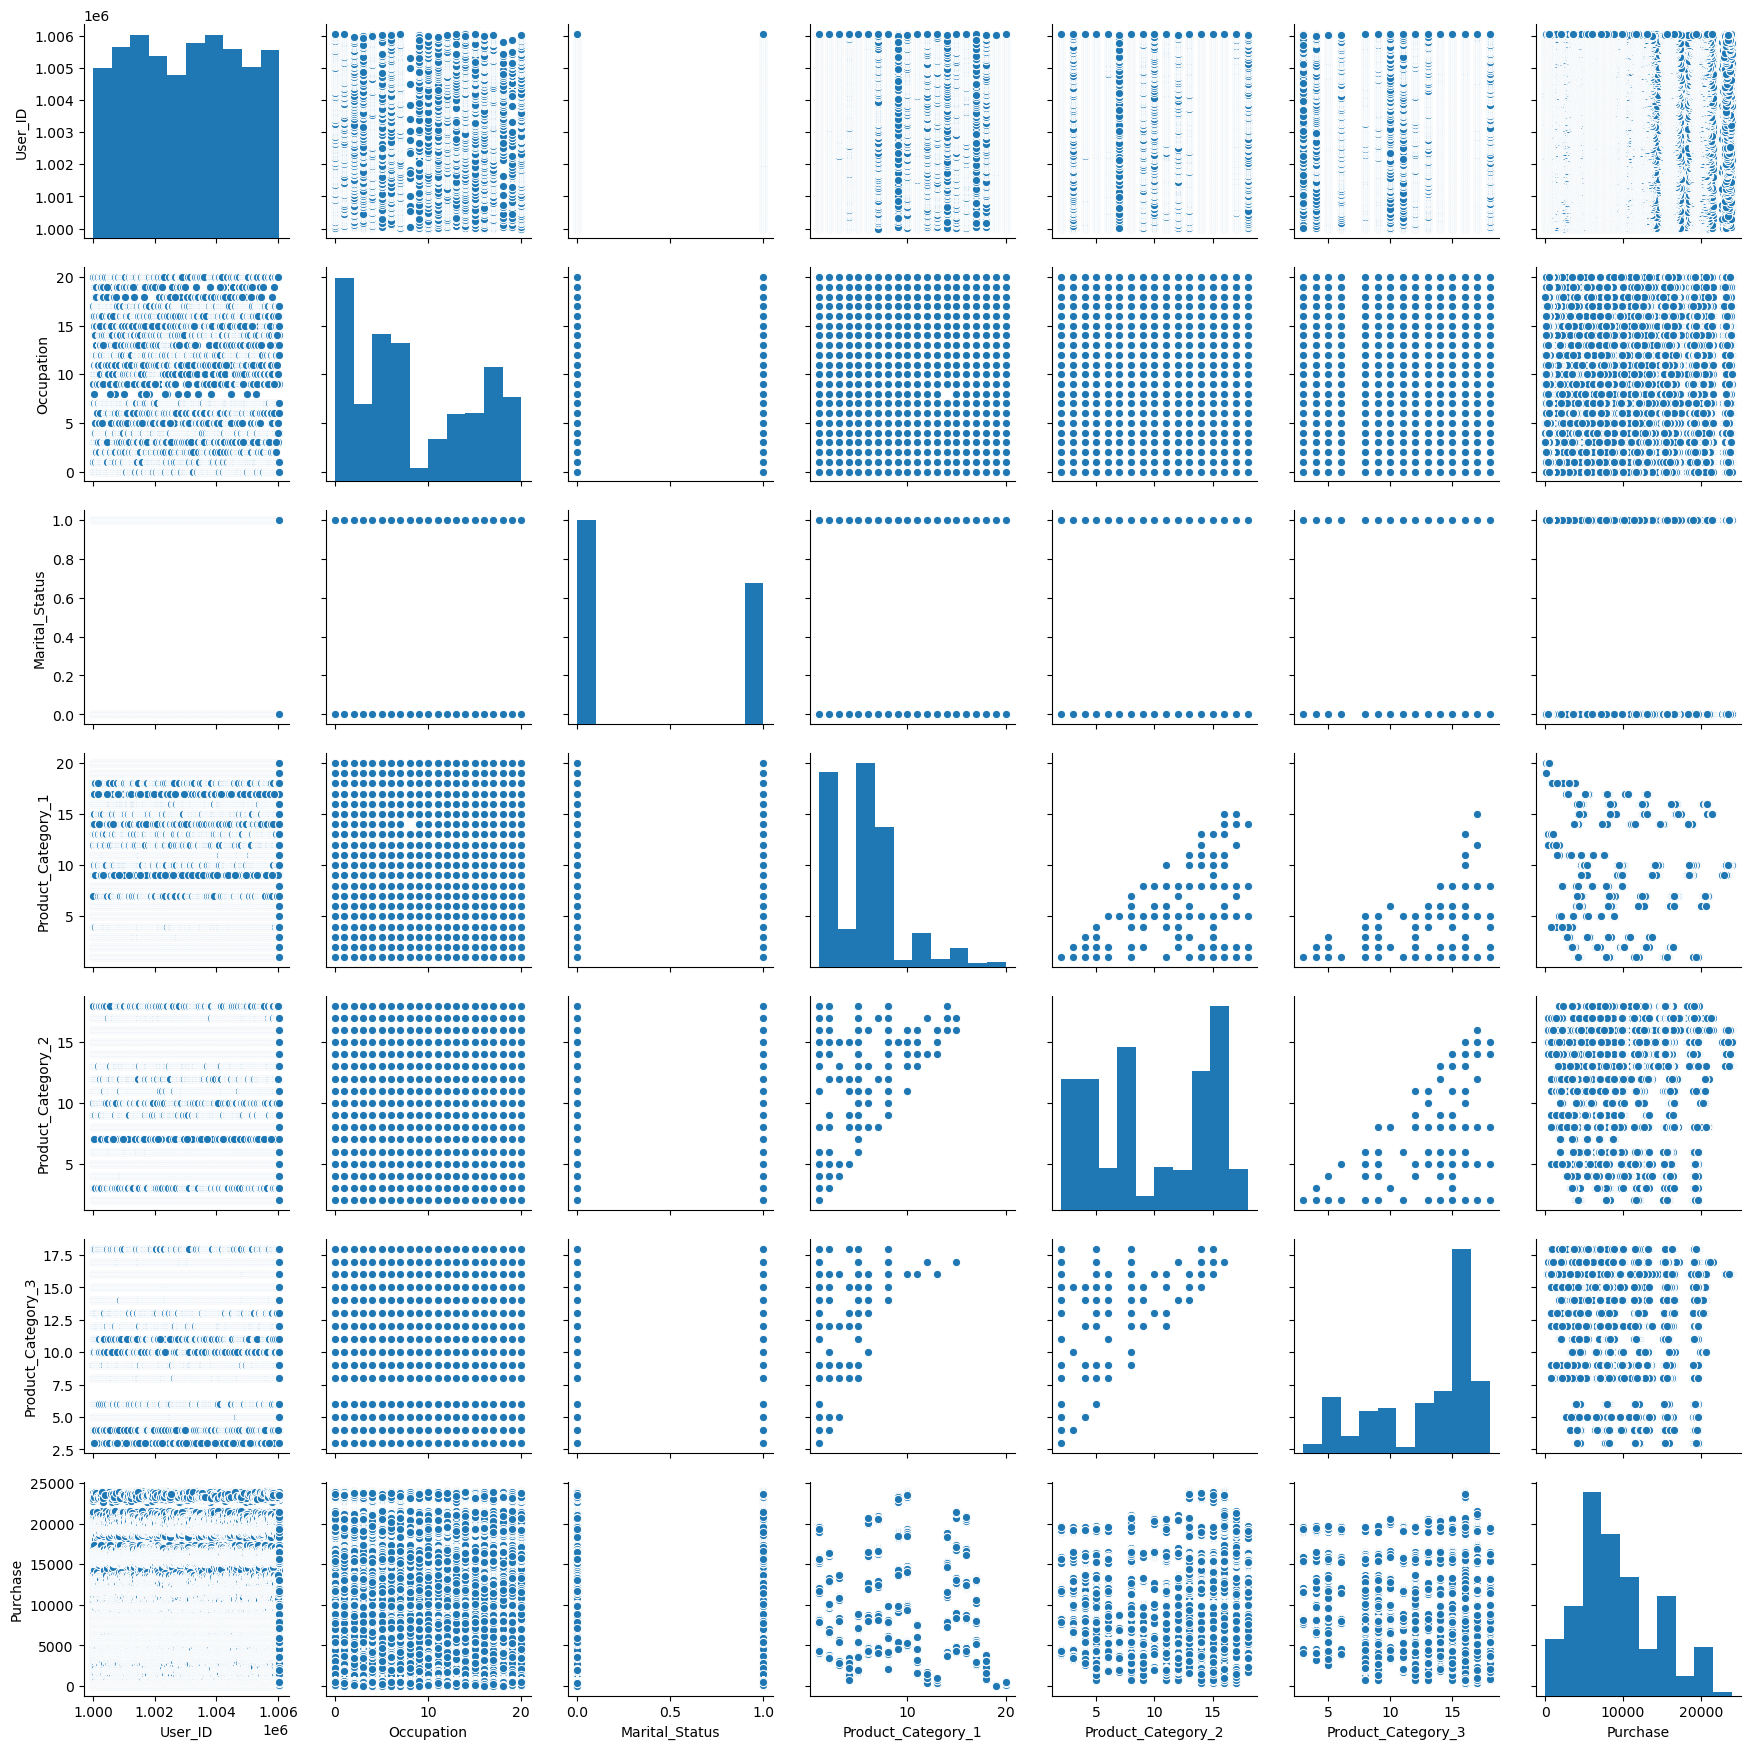

In [23]:
plt.style.use('default')
sns.pairplot(train)
plt.show()

### Creating a heatmap of correlation matrix


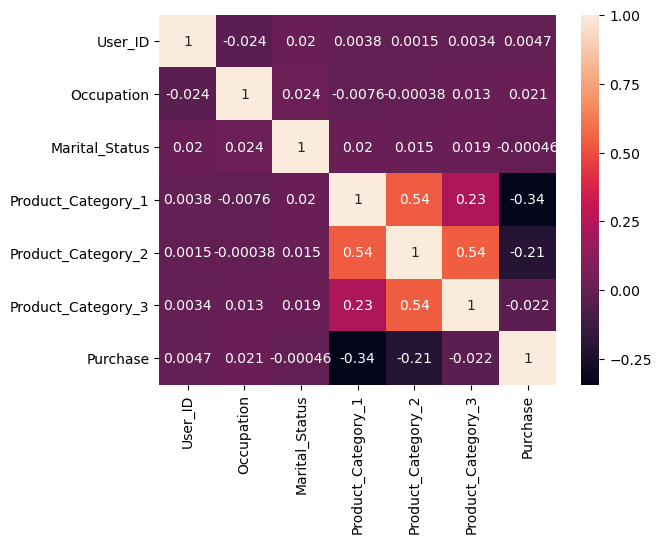

In [24]:
sns.heatmap(train.corr(), annot = True)
plt.show()

### Observations:
1. In the gender distribution plot that the shopping made by females was less than the number of men.

2. From the correlation heatmap, we can observe that the dependent feature 'Purchase' is highly correlated with 'Product_Category_1' and 'Product_Category_2'.

### Data Preprocessing

#### Replacing '+' in 'Age' and 'Stay_In_Current_City_Years'

In [25]:
train['Age'] = train['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [26]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

#### Dropping irrelevant features

In [27]:
train.drop('Product_Category_3', axis = 1, inplace = True)

In [28]:
train.drop('User_ID', axis = 1, inplace = True)

In [29]:
train.drop('Product_ID', axis = 1, inplace = True)

#### Feature Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoder_gender = LabelEncoder()
train['Gender'] = label_encoder_gender.fit_transform(train['Gender'])

In [32]:
label_encoder_age = LabelEncoder()
train['Age'] = label_encoder_age.fit_transform(train['Age'])

In [33]:
label_encoder_city = LabelEncoder()
train['City_Category'] = label_encoder_city.fit_transform(train['City_Category'])

#### Fixing null values in 'Product_Category_2'

In [34]:
train['Product_Category_2'].fillna(train['Product_Category_2'].median(), inplace = True)

#### Convert 'Stay_In_Current_City_Years' into numeric data type

In [35]:
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype('int')

### Feature Selection


#### Intuition
1. Use backward elimination technique to select the best features to train our model.
2. It displays some statistical metrics with there significance value.
3. Like, It shows the p values for each feature as per its significance in the whole dataset.
4. It also shows the adjusted R squared values to identify whether removing or selecting the feature is beneficial or not.
5. For now we will only look at the P and adjusted R squared value to decide which features to keep and which needed to be removed.

#### First check the index of the features and label


In [36]:
list(zip( range(0,len(train.columns)),train.columns))

[(0, 'Gender'),
 (1, 'Age'),
 (2, 'Occupation'),
 (3, 'City_Category'),
 (4, 'Stay_In_Current_City_Years'),
 (5, 'Marital_Status'),
 (6, 'Product_Category_1'),
 (7, 'Product_Category_2'),
 (8, 'Purchase')]

#### Seperating train into X and Y

In [37]:
X = train.drop("Purchase", axis = 1)
y = train["Purchase"]

#### Backward Elimination

In [38]:
X.shape, y.shape

((550068, 8), (550068,))

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [40]:
X1 = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)

In [41]:
X1.shape

(550068, 9)

#### Note:
* Here we will take the level of significance as 0.05 i.e. 5% which means that we will reject feature from the list of array and re-run the model till p value for all the features goes below .05 to find out the optimal combination for our model.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.model_selection import train_test_split 

import statsmodels.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [43]:
#Select all the features in X array
X_opt = X1[:,range(0,9)]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

#Fetch p values for each feature
p_Vals = regressor_OLS.pvalues

#define significance level for accepting the feature.
sig_Level = 0.05

#Loop to iterate over features and remove the feature with p value less than the sig_level
while max(p_Vals) > sig_Level:
    print("Probability values of each feature \n")
    print(p_Vals)
    X_opt = np.delete(X_opt, np.argmax(p_Vals), axis = 1)
    print("\n")
    print("Feature at index {} is removed \n".format(str(np.argmax(p_Vals))))
    print(str(X_opt.shape[1]-1) + " dimensions remaining now... \n")
    regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
    p_Vals = regressor_OLS.pvalues
    print("=================================================================\n")
    
#Print final summary
print("Final stat summary with optimal {} features".format(str(X_opt.shape[1]-1)))
regressor_OLS.summary()

Probability values of each feature 

const     0.000000e+00
x1       2.866866e-263
x2       2.551234e-129
x3        3.105918e-11
x4        0.000000e+00
x5        9.246563e-02
x6        6.158393e-05
x7        0.000000e+00
x8       9.263902e-291
dtype: float64


Feature at index 5 is removed 

7 dimensions remaining now... 


Final stat summary with optimal 7 features


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                 1.138e+04
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:36:50   Log-Likelihood:            -5.4309e+06
No. Observations:              550068   AIC:                         1.086e+07
Df Residuals:                  550060   BIC:                         1.086e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.099e+04     24.560    447.363      0.000    1.09e+04     1.1e+04
x1           513.5499     14.799     34.702      0.000     484.545     542.555
x2           120.5754      4.984     24.192      0.000     110.807     130.344
x3             6.5699      0.982      6.692      0.000       4.646       8.494
x4           350.2327      8.395     41.720      0.000     333.779     366.686
x5           -54.5515     13.547     -4.027      0.000     -81.104     -27.999
x6          -416.7652      1.709   -243.913      0.000    -420.114    -413.416
x7           -57.9109      1.588    -36.463      0.000     -61.024     -54.798
==============================================================================
Omnibus:                    61017.117   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85600.208
Skew:                           0.876   Prob(JB):                         0.00
Kurtosis:                       3.817   Cond. No.                         61.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations
* Finally we have reached the combination of optimum features with each feature having p value < 0.05.

### Split Data

### Split raw data


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4, test_size=0.2)


### Split data from the feature selection group


In [45]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_opt,y, random_state=4, test_size=0.2)

### Feature Extraction

Use PCA for feature extraction i.e. Principal Component Analysis. It is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components

#### Split Data
Lets split our data first before scaling the features

In [46]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X,y, random_state=4, test_size=0.2)

#### Scale Data
It is suggested to scale the input varibles first before applying PCA to standardise the variance and avoid the bias. Lets Scale the data using StandardScaler.

In [47]:
from numpy.linalg import eig

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)


In [49]:
cov_matrix = np.cov(X_train_pca.T)




### Calculate Eigenvalues and Eigenmatrix



In [50]:
eigenvalues, eigenvectors = eig(cov_matrix)

### Covariance Matrix

In [51]:
cov_matrix

array([[ 1.00000227e+00, -4.52223673e-03,  1.17768982e-01,
        -4.56191188e-03,  1.52916049e-02, -1.03729958e-02,
        -4.61279998e-02, -1.48579041e-02],
       [-4.52223673e-03,  1.00000227e+00,  9.16757829e-02,
         1.22602497e-01, -4.27670434e-03,  3.11659380e-01,
         6.05941074e-02,  4.31002761e-02],
       [ 1.17768982e-01,  9.16757829e-02,  1.00000227e+00,
         3.36802215e-02,  2.88892126e-02,  2.43184221e-02,
        -8.46827185e-03, -4.26402351e-04],
       [-4.56191188e-03,  1.22602497e-01,  3.36802215e-02,
         1.00000227e+00,  1.93798707e-02,  3.94953089e-02,
        -1.41251763e-02, -7.05031371e-03],
       [ 1.52916049e-02, -4.27670434e-03,  2.88892126e-02,
         1.93798707e-02,  1.00000227e+00, -1.12209728e-02,
        -4.22202140e-03, -1.95220821e-03],
       [-1.03729958e-02,  3.11659380e-01,  2.43184221e-02,
         3.94953089e-02, -1.12209728e-02,  1.00000227e+00,
         1.93904714e-02,  1.09659035e-02],
       [-4.61279998e-02,  6.059410

In [52]:
eigenvalues

array([1.41438012, 1.30498725, 0.67358868, 0.66122044, 1.10921259,
       0.87279581, 1.00486002, 0.95897328])

In [53]:
eigenvectors

array([[ 4.19292801e-02, -1.87368149e-01, -7.12562075e-02,
        -2.94476827e-02,  6.56778532e-01, -6.69171943e-01,
         2.78954495e-01,  1.50252837e-02],
       [-5.71331930e-01, -3.55829754e-01, -5.26981865e-01,
         4.98851238e-01, -1.11062619e-01,  2.54643076e-03,
         3.69266477e-02, -8.18388781e-02],
       [-1.50216833e-01, -2.55519761e-01,  1.14927499e-01,
        -9.47445270e-02,  6.14456267e-01,  7.03451196e-01,
         1.06872168e-01,  7.83450670e-02],
       [-2.06178248e-01, -2.54591491e-01,  1.18153015e-01,
        -1.35684697e-01, -2.85335903e-02, -1.61427167e-01,
        -4.85847339e-01,  7.72905362e-01],
       [ 7.03902891e-03, -4.26159228e-02, -6.74190166e-03,
         5.42429383e-03,  2.71059043e-01, -6.85496040e-02,
        -8.05411728e-01, -5.20768042e-01],
       [-4.90908069e-01, -3.55404374e-01,  4.87303540e-01,
        -4.21084983e-01, -2.42321730e-01, -1.44794017e-01,
         1.56451063e-01, -3.37279753e-01],
       [-4.36104446e-01,  5.390020

In [54]:
cov_matrix.dot(eigenvectors[:, 0])

array([ 0.05930394, -0.80808052, -0.2124637 , -0.29161441,  0.00995586,
       -0.69433061, -0.61681746, -0.59255577])

In [55]:

eigenvalues[0]*eigenvectors[:, 0]

array([ 0.05930394, -0.80808052, -0.2124637 , -0.29161441,  0.00995586,
       -0.69433061, -0.61681746, -0.59255577])

#### PCA application
Let's apply PCA technique on the training features to understand how many principal components should we select for our model to capture atleast 90% variance. For that we will take help of plot and cumsum function of numpy package.

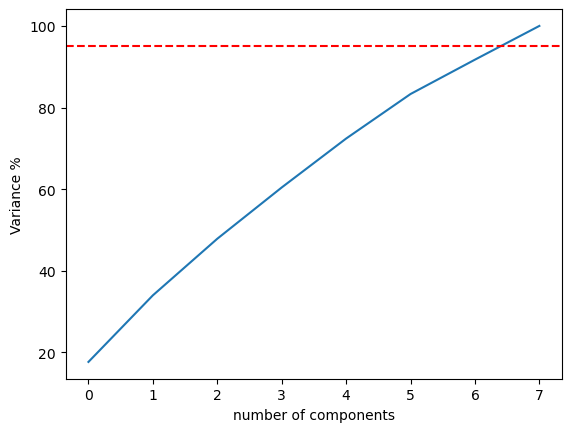

In [56]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel("number of components")
plt.ylabel("Variance %")
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [57]:
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
list(zip(range(1,len(arr)), arr))

[(1, 17.68),
 (2, 33.989999999999995),
 (3, 47.85999999999999),
 (4, 60.41999999999999),
 (5, 72.40999999999998),
 (6, 83.31999999999998),
 (7, 91.73999999999998)]

### Observation
Here we can see that 6 variables captured atleast 95% of the variance in the training dataset. Hence we will use the same set of variables.

In [58]:
pca_10 = PCA(n_components=6)
X_train_pca = pca_10.fit_transform(X_train_pca)
X_test_pca = pca_10.transform(X_test_pca)

* PCA is applied on the training and the test dataset. Our input features are now ready for the regression

### Correlation Analysis

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two or more, numerically measured, continuous variables. This analysis is useful when we need to check if there are possible connections between variables. We will utilize Heatmap for our analysis.

### Heatmap

A heatmap is a graphical representation of data that uses a system of color-coding to represent statistical relationship between different values.

Let's plot the relationship between the features of the Feature selection group first

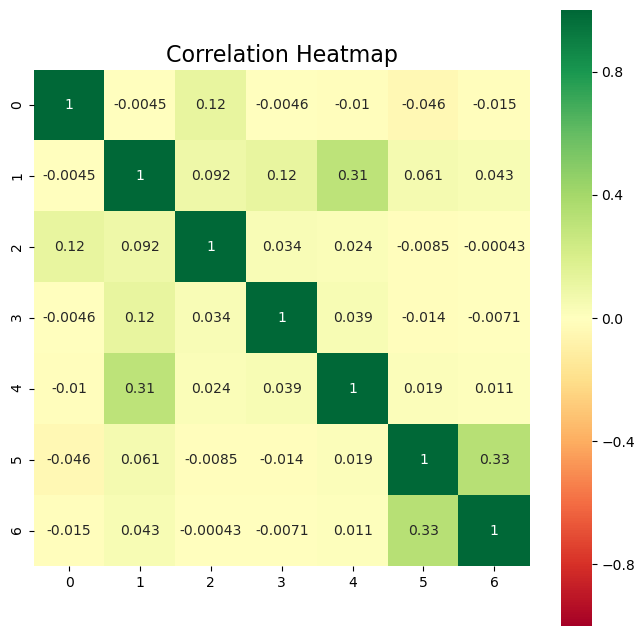

In [59]:
plt.figure(figsize=(8,8))
corr = pd.DataFrame(X_train_fs[:,1:]).corr()
corr.index = pd.DataFrame(X_train_fs[:,1:]).columns
sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1, square=True,annot=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

#### Observations
* Some combinations of features shows slight correlation but not above 0.5.

* But most of the features shows no correlation. Which is a good thing.



#### Let's now plot the relationship between the features of the Feature extraction group.

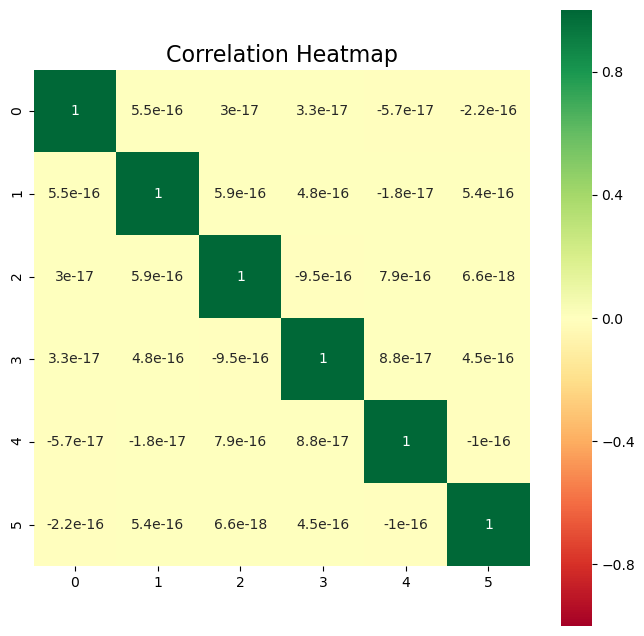

In [60]:
plt.figure(figsize=(8,8))
corr = pd.DataFrame(X_train_pca).corr()
corr.index = pd.DataFrame(X_train_pca).columns
sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1, square=True,annot=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

### Observations
All of the features shows NO correlation at all. Because feature extraction removes all collinearity.

### Model

#### Model training

### Linear regressor for the raw data


In [61]:
regressor = LinearRegression() 
regressor.fit(X_train,y_train) 


LinearRegression()

### Linear regressor for the Feature selection group


In [62]:
regressor1 = LinearRegression() 
regressor1.fit(X_train_fs,y_train_fs) 


LinearRegression()

### Linear regressor for the Feature extraction group

In [63]:
regressor2 = LinearRegression() 
regressor2.fit(X_train_pca,y_train_pca) 

LinearRegression()

#### Model Prediction

In [64]:
y_pred = regressor.predict(X_test) 
print("Predicting from the test features of raw data",y_pred)

y_pred = regressor1.predict(X_test_fs)
print("Predicting from the test features of Feature Selection group",y_pred)

y_pred_pca = regressor2.predict(X_test_pca) 
print("Predicting from the test features of Feature Extraction group",y_pred_pca)


Predicting from the test features of raw data [ 7507.8517671  11078.1646273  11064.86289664 ... 11480.6207426
  7866.09980517  7568.65797704]
Predicting from the test features of Feature Selection group [ 7505.86755076 11065.44596391 11087.47835651 ... 11456.64390741
  7864.73973802  7578.80570904]
Predicting from the test features of Feature Extraction group [ 7291.5147709   9592.71968689 11656.6092364  ...  9916.15573971
  7523.53539374  6957.36352629]


#### Model Evaluation

In [65]:
print('RMSE score for the Multiple LR raw data is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print('Variance score for the Multiple LR raw data is : %.2f' % regressor.score(X_test, y_test))
print("\n")

print('RMSE score for the Multiple LR Feature selection group is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_fs,y_pred))))
print('Variance score for the Multiple LR Feature selection group is : %.2f' % regressor1.score(X_test_fs, y_test_fs))
print("\n")

print('RMSE score for the Multiple LR PCA is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_pca,y_pred_pca))))
print('Variance score for the Multiple LR PCA is : %.2f' % regressor2.score(X_test_pca, y_test_pca))

RMSE score for the Multiple LR raw data is : 4703.398179213667
Variance score for the Multiple LR raw data is : 0.13


RMSE score for the Multiple LR Feature selection group is : 4703.398179213667
Variance score for the Multiple LR Feature selection group is : 0.13


RMSE score for the Multiple LR PCA is : 4769.72778196358
Variance score for the Multiple LR PCA is : 0.10


### Observation

In [66]:
X_train.shape

(440054, 8)

### Find linear correlation of each feature with the target variable


In [67]:
from scipy.stats import pearsonr
df1 = pd.DataFrame(np.concatenate((X_train,y_train.values.reshape(len(y_train),1)),axis=1))
df1.columns = df1.columns.astype(str)

features = df1.iloc[:,:8].columns.tolist()
target = df1.iloc[:,8].name

correlations = {}
for f in features:
    data_temp = df1[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]
    
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]


,Value
6 vs 8,-0.343724
7 vs 8,-0.156100
3 vs 8,0.061725
0 vs 8,0.061055
2 vs 8,0.020974
1 vs 8,0.016639
4 vs 8,0.006310
5 vs 8,-0.000801


### Observation

We can see that none of the feature is linearly correlated with the target variable "8". That is why it is not a good model for the prediction. So let's move ahead and try the random forest regressor. We are not using decision tree regressor because the random forest will anyways consist of almost all its properties. 

### Random Forest Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting

### Instantiate the object for the Random Forest Regressor with default params from raw data
### Train the object with default params for raw data

In [68]:
regressor_rfraw = RandomForestRegressor(n_jobs=-1)
regressor_rfraw.fit(X_train,y_train)


RandomForestRegressor(n_jobs=-1)

### Instantiate the object for the Random Forest Regressor with default params for Feature Selection Group
### Train the object with default params for Feature Selection Group


In [69]:
regressor_rf = RandomForestRegressor(n_jobs=-1)
regressor_rf.fit(X_train_fs,y_train_fs)

RandomForestRegressor(n_jobs=-1)

### Instantiate the object for the Random Forest Regressor for Feature Extraction Group
### Train the object with default params for Feature Extraction Group

In [70]:
regressor_rf2 = RandomForestRegressor(n_jobs=-1)
regressor_rf2.fit(X_train_pca,y_train_pca)


RandomForestRegressor(n_jobs=-1)

### Model Prediction

In [71]:
y_pred_rfraw = regressor_rfraw.predict(X_test)

y_pred_rf = regressor_rf.predict(X_test_fs)

y_pred_rfpca = regressor_rf2.predict(X_test_pca)

print("Predicting the output with object of default params for raw data",y_pred_rfraw)
print("Predicting the output with object of default params for Feature Selection Group",y_pred_rf)
print("Predicting the output with object of default params for Feature Extraction Group",y_pred_rfpca)


Predicting the output with object of default params for raw data [ 7299.79256649 15602.68918664 12426.78       ... 14806.81638567
  6911.09805132  7439.42461199]
Predicting the output with object of default params for Feature Selection Group [ 7082.64421131 14276.84670634 12604.30421059 ... 14717.23957454
  7607.38426994  7776.99618464]
Predicting the output with object of default params for Feature Extraction Group [ 7227.80829958 15674.27811959 11987.92785287 ... 14752.04587695
  6907.08840368  7492.8569683 ]


### Model Evaluation

In [72]:
print('RMSLE score for the RF regressor for raw data is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_rfraw))))
print('Variance score for the RF regressor for raw data is : %.2f' % regressor_rfraw.score(X_test, y_test))

print("\n")

print('RMSLE score for the RF regressor for Feature Selection Group is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test_fs,y_pred_rf))))
print('Variance score for the RF regressor for Feature Selection Group is : %.2f' % regressor_rf.score(X_test_fs, y_test_fs))

print("\n")

print('RMSLE score for the RF regressor for Feature Extraction Group is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test_fs,y_pred_rf))))
print('Variance score for the RF regressor for Feature Extraction Group is : %.2f' % regressor_rf2.score(X_test_pca, y_test_pca))


RMSLE score for the RF regressor for raw data is : 0.37719602055745516
Variance score for the RF regressor for raw data is : 0.64


RMSLE score for the RF regressor for Feature Selection Group is : 0.38023410052867057
Variance score for the RF regressor for Feature Selection Group is : 0.64


RMSLE score for the RF regressor for Feature Extraction Group is : 0.38023410052867057
Variance score for the RF regressor for Feature Extraction Group is : 0.56


### Observation:
* The root mean squared has been calculated using linear regression and using randomforest regressor It can be seen that Random Forest Regressor shows better result. The RMSLE for raw data, for feature selection data and Feature Extraction data are almost 0.37  


### Result
* The correlation has been checked and the most correlated features are Product Category 1 and 2 are correlated with 33%, age and number of years stayed in the current city with the correlation of 33%.
* The Covariance matrix, Eigen vaues and Eigen vectors are successfully calculated
* About 6 variables captured atleast 95% of the variance in the training dataset. Out of 6 two most important principal components are: Age and Category of city have the highest variance ratio explained in the dataset 34% and 60.4% respectively
* The features selected using PCA are: Gender, Age, Occupation, Number of years stayed in current city, Product category (Masked)
